In [92]:
import numpy as np
import pandas as pd
import talib 
import tensorflow
import keras

In [93]:
import random
random.seed(1234)

In [94]:
dataset = pd.read_csv('C:\\BÜSRA\\Uni\\Master\\Pflichtfächer\\Projekt Simulation SS 18\\DATEN IBM\\ohlc_jan17_feb18.csv')
dataset = dataset.dropna()
dataset = dataset[['<OPEN>','<HIGH>','<LOW>','<CLOSE>']]

In [95]:
dataset.head()

,<OPEN>,<HIGH>,<LOW>,<CLOSE>
0,167.130,167.86,166.02,167.18
1,167.615,169.84,167.42,169.24
2,169.250,169.36,167.29,168.72
3,168.800,169.91,167.66,169.56
4,169.470,169.73,167.66,167.71


In [96]:
#fh=open("C:\\Users\\Büsra\\Desktop\\KNN_Log_Returns_output.txt",'w')
#print(dataset,file=fh)
#fh.close()

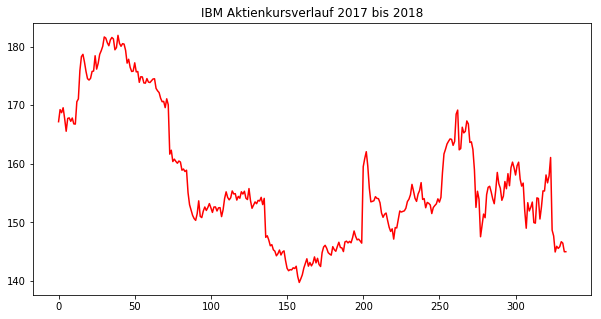

In [97]:
from matplotlib import pyplot
%matplotlib inline
datz = dataset['<CLOSE>']
#datz.head()
pyplot.figure(figsize=(10,5))
pyplot.plot(datz, color='r')
pyplot.title('IBM Aktienkursverlauf 2017 bis 2018')
pyplot.show()

In [98]:
dataset['H-L'] = dataset['<HIGH>'] - dataset['<LOW>']
dataset['O-C'] = dataset['<CLOSE>'] - dataset['<OPEN>']
dataset['Close(t+1)']=dataset['<CLOSE>'].shift(-1)
#dataset["Preis_differenz"]=dataset['<CLOSE>']-dataset['<CLOSE>'].shift(-1)

In [99]:
dataset = dataset.dropna()
dataset = dataset.dropna(thresh=2)
dataset.head()

,<OPEN>,<HIGH>,<LOW>,<CLOSE>,H-L,O-C,Close(t+1)
0,167.130,167.86,166.02,167.18,1.84,0.050,169.24
1,167.615,169.84,167.42,169.24,2.42,1.625,168.72
2,169.250,169.36,167.29,168.72,2.07,-0.530,169.56
3,168.800,169.91,167.66,169.56,2.25,0.760,167.71
4,169.470,169.73,167.66,167.71,2.07,-1.760,165.55


In [100]:
X = dataset[['<CLOSE>', 'H-L','O-C',]]
y = dataset[['Close(t+1)']]

In [101]:
X.head()

,<CLOSE>,H-L,O-C
0,167.18,1.84,0.050
1,169.24,2.42,1.625
2,168.72,2.07,-0.530
3,169.56,2.25,0.760
4,167.71,2.07,-1.760


In [102]:
y.head()

,Close(t+1)
0,169.24
1,168.72
2,169.56
3,167.71
4,165.55


In [103]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

In [104]:
X_train = X[:251]
X_test = X[251:]
y_train = y[:251]
y_test = y[251:]

In [105]:
print(len(X_train), len(X_test))
print(len(y_train),len(y_test))

251 82
251 82


In [106]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [107]:
knn = Sequential()
knn.add(Dense(units = 12, kernel_initializer = 'uniform', activation = 'relu', input_dim = X.shape[1]))
knn.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
knn.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'linear'))

In [108]:
knn.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [109]:
hist = knn.fit(X_train, y_train, batch_size = 10, epochs = 50, validation_data=(X_test, y_test), verbose=2, shuffle=False)

Train on 251 samples, validate on 82 samples
Epoch 1/50
 - 0s - loss: 0.2555 - val_loss: 0.1595
Epoch 2/50
 - 0s - loss: 0.2385 - val_loss: 0.1427
Epoch 3/50
 - 0s - loss: 0.2196 - val_loss: 0.1232
Epoch 4/50
 - 0s - loss: 0.1976 - val_loss: 0.1010
Epoch 5/50
 - 0s - loss: 0.1726 - val_loss: 0.0771
Epoch 6/50
 - 0s - loss: 0.1460 - val_loss: 0.0530
Epoch 7/50
 - 0s - loss: 0.1192 - val_loss: 0.0327
Epoch 8/50
 - 0s - loss: 0.0969 - val_loss: 0.0217
Epoch 9/50
 - 0s - loss: 0.0826 - val_loss: 0.0187
Epoch 10/50
 - 0s - loss: 0.0749 - val_loss: 0.0188
Epoch 11/50
 - 0s - loss: 0.0708 - val_loss: 0.0195
Epoch 12/50
 - 0s - loss: 0.0683 - val_loss: 0.0199
Epoch 13/50
 - 0s - loss: 0.0666 - val_loss: 0.0201
Epoch 14/50
 - 0s - loss: 0.0651 - val_loss: 0.0201
Epoch 15/50
 - 0s - loss: 0.0639 - val_loss: 0.0201
Epoch 16/50
 - 0s - loss: 0.0627 - val_loss: 0.0200
Epoch 17/50
 - 0s - loss: 0.0615 - val_loss: 0.0199
Epoch 18/50
 - 0s - loss: 0.0604 - val_loss: 0.0198
Epoch 19/50
 - 0s - loss: 0.

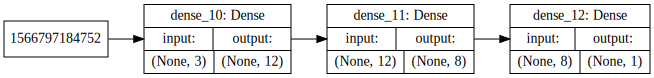

In [110]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(knn, show_shapes=True, rankdir='LR').create(prog='dot', format='svg'))

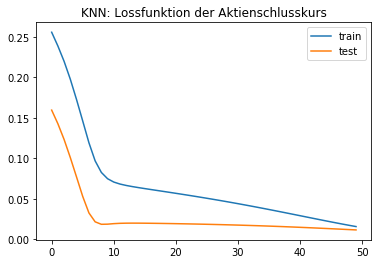

In [111]:
# plot history
pyplot.plot(hist.history['loss'], label='train')
pyplot.plot(hist.history['val_loss'], label='test')
pyplot.title('KNN: Lossfunktion der Aktienschlusskurs')
pyplot.legend()
pyplot.show()

In [112]:
y_pred = knn.predict(X_test)
#y_pred
#y_test

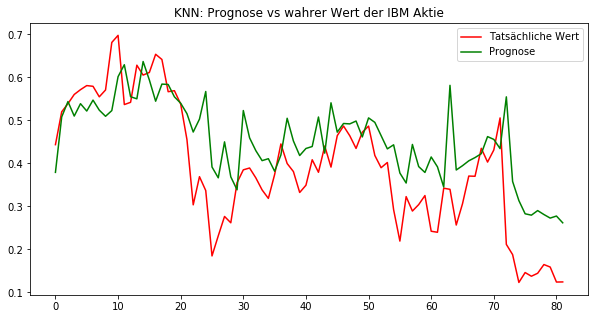

In [113]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(y_test, color='r', label='Tatsächliche Wert')
plt.plot(y_pred , color='g', label='Prognose')
plt.title('KNN: Prognose vs wahrer Wert der IBM Aktie')
plt.legend()
plt.show()

In [114]:
#y_test

In [115]:
#y_pred

In [116]:
from math import sqrt
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print('Test MSE: %.4f' % mse)

rmse = sqrt(mean_squared_error(y_test, y_pred))
print('Test RMSE: %.4f' % rmse)

Test MSE: 0.0117
Test RMSE: 0.1083


In [117]:
LP_knn_close=open("C:\\BÜSRA\\Uni\\Master\\Pflichtfächer\\Projekt Simulation SS 18\\Output\\Langzeit Output\\LP_KNN_Close.txt",'w')
print(y_test,file=LP_knn_close)
LP_knn_close.close()

In [118]:
LP_knn_output_close=open("C:\\BÜSRA\\Uni\\Master\\Pflichtfächer\\Projekt Simulation SS 18\\Output\\Langzeit Output\\LP_KNN_Close_output.txt",'w')
print(y_pred,file=LP_knn_output_close)
LP_knn_output_close.close()